# Predicting heart disease using machine learning
This notebook looks into using many Python-based and data science libraries in an attempt to build a machine learning model to predict heart disease. In order to run successfully the program, the following command needs to be run for having the proper env: `conda env create --prefix ./env -f environment.yml`
The following approach will be taken:
1. Problem definition
2. Data
3. Evaluaiton
4. Features
5. Modelling
6. Experimentaiton

## 1. Problem Definition
Given a clinical dataset, can we predict if someone has heart disease?


## 2. Data
* Column Descriptions:
* Id (Unique id for each patient)
* Age (Age of the patient in years)
* Origin (place of study)
* Sex (Male/Female)
* Cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* Trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* Chol (serum cholesterol in mg/dl)
* Fbs (if fasting blood sugar > 120 mg/dl)
* Restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* Thalach: maximum heart rate achieved
* Exang: exercise-induced angina (True/ False)
* Oldpeak: ST depression induced by exercise relative to rest
* Slope: the slope of the peak exercise ST segment
* Ca: number of major vessels (0-3) colored by fluoroscopy
* Thal: [normal; fixed defect; reversible defect]
* Num: the predicted attribute

The original data comes from Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3. Evaluation
Checking is the accuracy of prediction can reach to 95%


## 4. Features
Creating a data dictionary


In [2]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [5]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape  # raws and columns

(303, 14)

In [7]:
# Data exploration
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
#number of classes
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

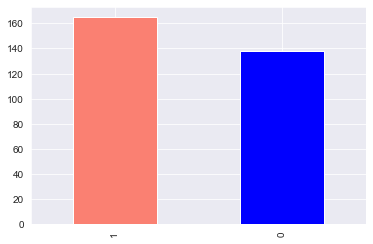

In [10]:
df.target.value_counts().plot(kind="bar", color=["salmon","blue"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Diseae frequence accorning to Sex

In [14]:
df.sex.value_counts()
# Sex: 1 male, 0 female

1    207
0     96
Name: sex, dtype: int64

In [15]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

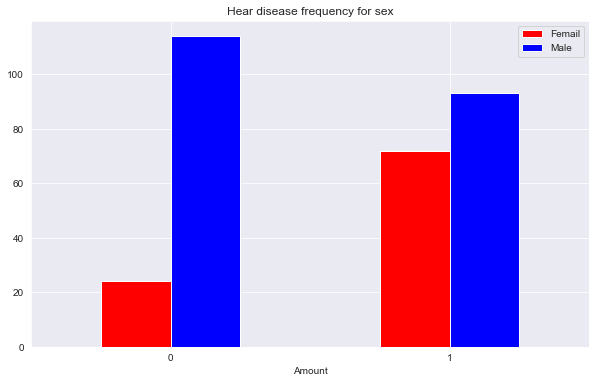

In [16]:
 # create a plot of cross tab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6),color=["red", "blue"])
plt.title("Hear disease frequency for sex")
plt.xlabel(" 0 No disease, 1 Disease")
plt.xlabel("Amount")
plt.legend(["Femail", "Male"])
plt.xticks(rotation=0 )

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.thalach.value_counts()
# Max hear rate achieved

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart rate for Heart Disease

In [21]:
 plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

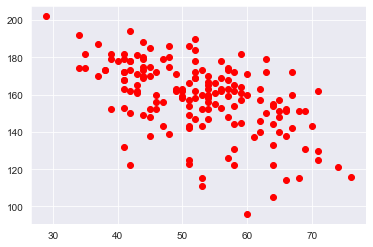

In [22]:
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="red")

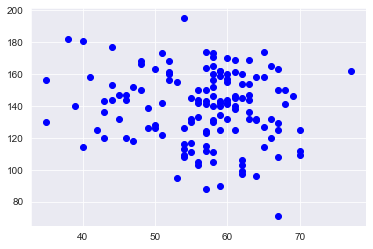

In [24]:
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c="blue")

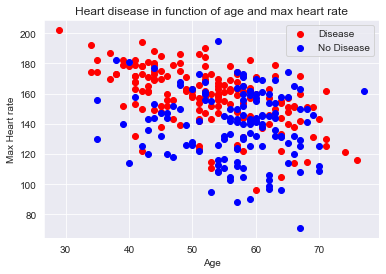

In [38]:
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="red")

plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c="blue")

plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No Disease"]);
plt.xticks(rotation=0);

<AxesSubplot:ylabel='Frequency'>

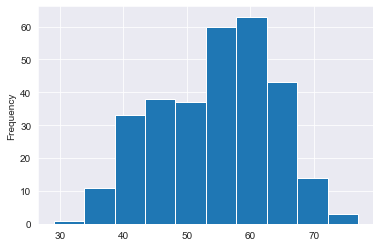

In [27]:
# Check the distribution of the age
df.age.plot.hist()

##  Heart disease frequency per chest pain type
0: Typical Agina pain related to decrease blood supply
1: Atypical Agina not related to heart disease
2: Non-Agina Pain not related to heart disease
3; Asymptomatic: chest pain not showing signs od disease

In [32]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [33]:
# make the cross tap more visual

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

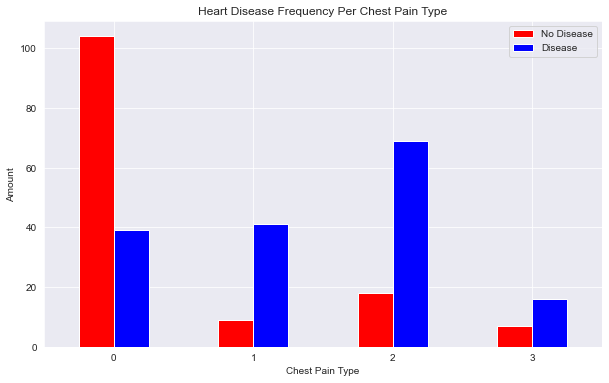

In [34]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["red", "blue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

### Make a correlation matrix

In [39]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


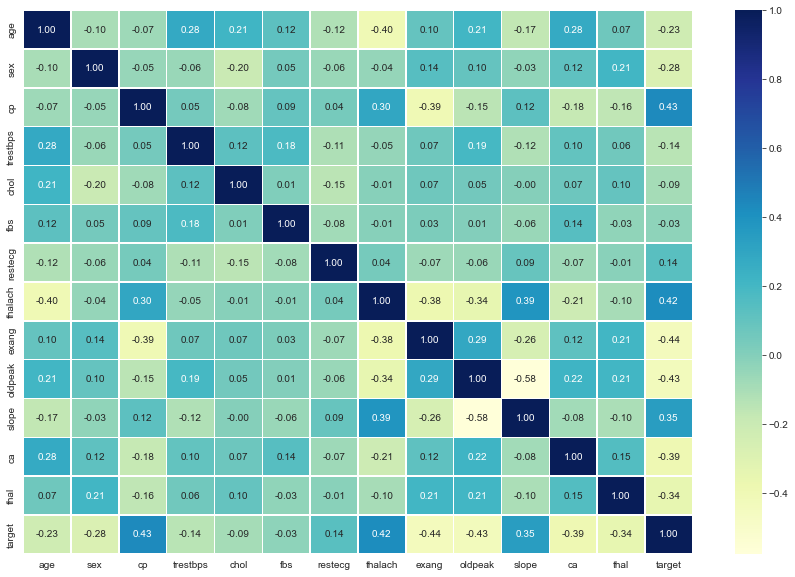

In [42]:
# making the corr matrix prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

## Modelling
   If we can reach minimum 95 percent of accuracy whether or not a patient had heart disease during the proof of concept


In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
# Split data into X , y
X = df.drop("target", axis=1)
y = df["target"]

In [45]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [46]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [47]:
# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [48]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [49]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [52]:
X_train.shape

(242, 13)

In [53]:
y_train.shape

(242,)

In [54]:
# Now we have train and test, we build machine learning model and test the model using the test set
# we want to classify if some one has heart disease, we use Random Forest classifiers.
# we will try 3 different machine learning model":
# Logistic regression, K-nearest neighbors classifier, Random forest classifier

In [57]:
# We put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}


# A function for fiting and scoring
def fit_and_score(models, X_train,X_test, y_train, y_test):
    """
    Fits and evaluates  given machine learning models.
    models: a dict of different scikit learn machine learning models
    """
    np.random.seed(42)

    #make a dict to keep the model scores

    model_scores = {}

    # Loop through the models

    for name , model  in models.items():
        #fitting the model
        model.fit(X_train, y_train)

        #Evaluate each model and appent its score to the model_scores dictionary
        model_scores[name] = model.score(X_test, y_test)
    return model_scores